Title: Deep Analysis on Trending Youtube Video Statistics
    
Problem:
Data exploration and in-depth analysis on YouTube Trending Video Statistics in United States. 
Insights which tell us what makes videos trending and maybe building a machine learning model which 
can help predict the same.

Business Value\Impact:
It’s a good reference for YouTubers who are interested in making trending videos in the United States. Also, it’s a good reference for considering what kind of trending videos are recommended to appear more often in the suggested list. 


In [35]:
import pandas as pd
import re 

#df = pd.read_csv('/home/liyan/Desktop/SpringBoard/Capstone\ Project\ \#1/USvideos.csv')
df = pd.read_csv('/home/liyan/Desktop/Capstone_Project_1/USvideos.csv')
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


There is catecory_id confusion for ID '43', which contains both 'Film and Animation' and 'Smart Phone'. I reclassify the videos from "CNET" channel to category_id "3" as 'Smart Phone'.

In [36]:
for i in range(len(df)):
    if df.channel_title[i] == 'CNET':
        df.category_id[i] = '3'
    elif df.category_id[i] == '43':
         df.category_id[i] = '1'
#df.category_id.drop_duplicates()    

df[df.category_id == 3].head(2)

/home/liyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
7854,lM0yu7c6lQk,17.23.12,You're not crazy. Apple is slowing down older ...,CNET,3,2017-12-22T01:16:16.000Z,"Apple|""iPhone Slowdown""|""Apple Battery""|""Cultu...",110112,3547,180,1426,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...
8077,lM0yu7c6lQk,17.24.12,You're not crazy. Apple is slowing down older ...,CNET,3,2017-12-22T01:16:16.000Z,"Apple|""iPhone Slowdown""|""Apple Battery""|""Cultu...",134433,4080,202,1645,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...


In [37]:
# Add a catrgory_name column to the dataframe based on its category_id.
list_map = sorted(df.category_id.drop_duplicates())

cat_name = ['Film and Animation', 'Cars and Vehicles', 'Smart Phone', 'Music', 'Pets and Animals', 'Sports', 'Travel', 'Game', 'People and Blogs', 'Comedy', 'Entertainment', 'News and Politics', 'How to and Style', 'Education', 'Science and Technology', 'Nonprofits and Activism', 'News & Politics']
dic_raw = dict(zip(list_map, cat_name))
dic_raw

df['category_name'] = df.category_id.apply(lambda row : dic_raw[row])
df.head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment


In [38]:
df_month = df.trending_date.apply(lambda x: re.search('(\d+)\.(\d+)\.(\d+)', x).group(3))
df.trending_date = df_month.astype(int)

df_publish_time = df.publish_time.apply(lambda x : re.search(r"(?<=T).*?(?=:)", x).group(0))
df.publish_time = df_publish_time.astype(int)
df[['comments_disabled', 'ratings_disabled', 'video_error_or_removed']] = df[['comments_disabled', 'ratings_disabled', 'video_error_or_removed']].astype(int)


df.columns = ['video_id','trending_month','title','channel_title','category_id','publish_hour','tags','views','likes','dislikes','comment_count','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description','category_name']
df.head(2)

,video_id,trending_month,title,channel_title,category_id,publish_hour,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,0,0,0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,7,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,0,0,0,"One year after the presidential election, John...",Entertainment


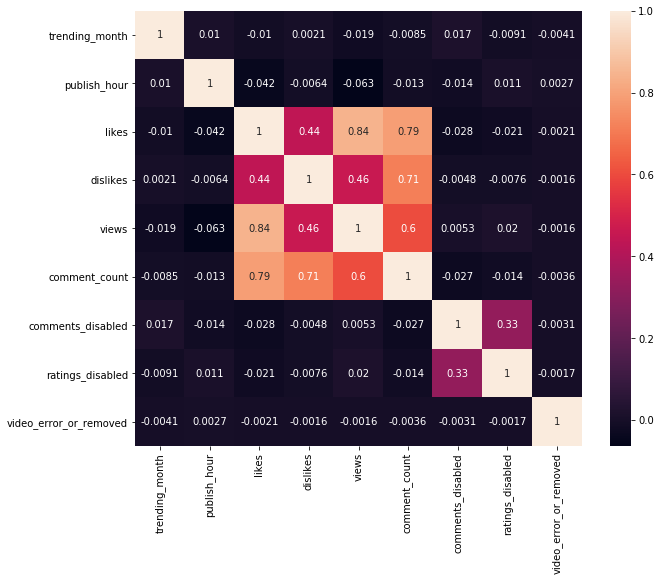

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
sns.heatmap(df[['trending_month', 'publish_hour','likes','dislikes','views','comment_count','comments_disabled','ratings_disabled','video_error_or_removed']].corr(), annot=True)
plt.show()

In [40]:
dic = df[['category_id','category_name','views','likes','dislikes','comment_count']].groupby('category_name').sum()[:10].to_dict()
dic

{'category_id': {'Cars and Vehicles': 768,
  'Comedy': 72933,
  'Education': 42444,
  'Entertainment': 218856,
  'Film and Animation': 2100,
  'Game': 12800,
  'How to and Style': 99736,
  'Music': 56520,
  'News & Politics': 1376,
  'News and Politics': 59800},
 'views': {'Cars and Vehicles': 520690717,
  'Comedy': 4469865080,
  'Education': 1052393872,
  'Entertainment': 17523046299,
  'Film and Animation': 5554423655,
  'Game': 1419295967,
  'How to and Style': 3456937359,
  'Music': 31362590385,
  'News & Politics': 37564573,
  'News and Politics': 1268044886},
 'likes': {'Cars and Vehicles': 4245656,
  'Comedy': 192512229,
  'Education': 42931493,
  'Entertainment': 459483306,
  'Film and Animation': 129820163,
  'Game': 46072842,
  'How to and Style': 134741889,
  'Music': 1131468821,
  'News & Politics': 827290,
  'News and Politics': 15074664},
 'dislikes': {'Cars and Vehicles': 243010,
  'Comedy': 6304534,
  'Education': 1249335,
  'Entertainment': 38822391,
  'Film and Animat

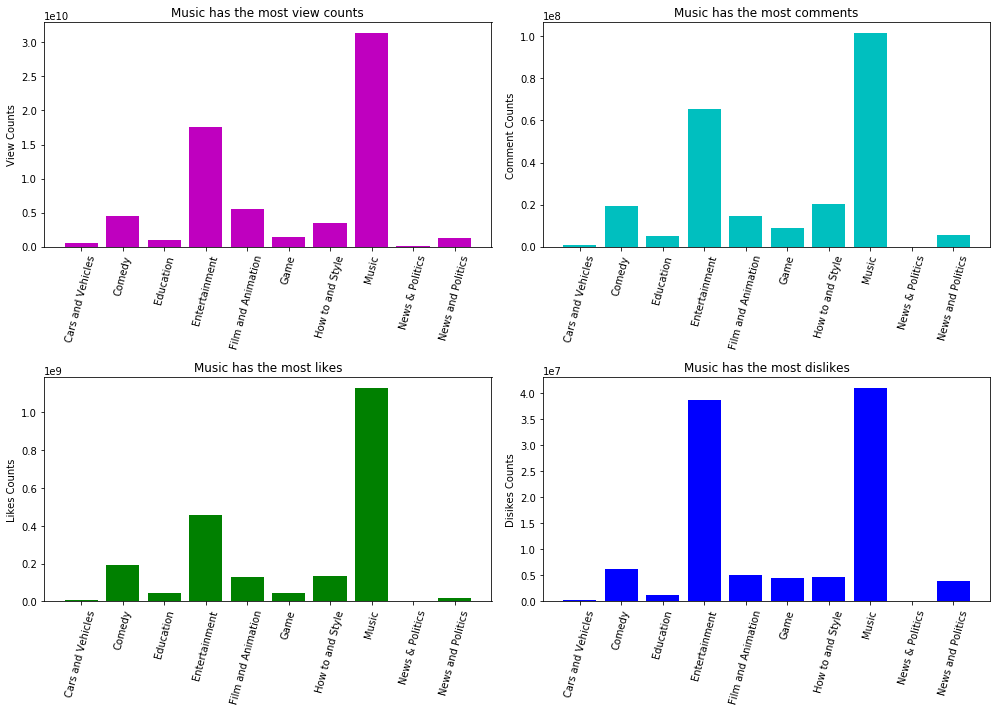

In [41]:
plt.figure(figsize = (14,10))

plt.subplot(2,2,1)
plt.xticks(range(len(dic['views'])), dic['views'].keys(), rotation = 75)
plt.bar(range(len(dic['views'])),dic['views'].values(), color = 'm')
        
plt.title('Music has the most view counts')
plt.ylabel('View Counts')

plt.subplot(2,2,2)
plt.xticks(range(len(dic['comment_count'])), dic['comment_count'].keys(), rotation = 75)
plt.bar(range(len(dic['comment_count'])),dic['comment_count'].values(), color = 'c')
        
plt.title('Music has the most comments')
plt.ylabel('Comment Counts')

plt.subplot(2,2,3)
plt.xticks(range(len(dic['likes'])), dic['likes'].keys(), rotation = 75)
plt.bar(range(len(dic['likes'])),dic['likes'].values(), color = 'g')
        
plt.title('Music has the most likes')
plt.ylabel('Likes Counts')

plt.subplot(2,2,4)
plt.xticks(range(len(dic['dislikes'])), dic['dislikes'].keys(), rotation = 75)
plt.bar(range(len(dic['dislikes'])),dic['dislikes'].values(), color = 'b')
        
plt.title('Music has the most dislikes')
plt.ylabel('Disikes Counts')


plt.tight_layout()
plt.show()

/home/liyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/liyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(3,53,'Maximum')

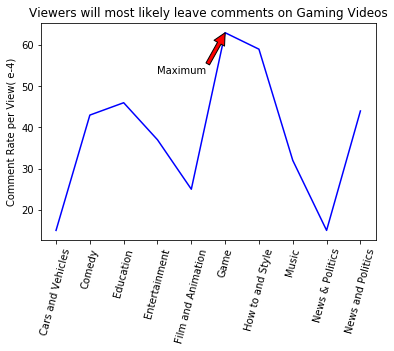

In [42]:
import numpy as np
from decimal import Decimal

df_ratio = df[['category_id','category_name','views','likes','dislikes','comment_count','trending_month']].groupby('category_name').sum()


df_ratio_comment = df_ratio[['views', 'comment_count']]

df_ratio_comment['ratio']=range(len(df_ratio_comment))
for i in range(len(df_ratio_comment)):
   df_ratio_comment['ratio'][i] = df_ratio_comment.comment_count[i]/df_ratio_comment.views[i]*10000

df_ratio_comment = df_ratio_comment[:10]
df_ratio_comment

plt.xticks(range(len(df_ratio_comment)), df_ratio_comment.index, rotation = 75)
plt.plot(range(len(df_ratio_comment)),df_ratio_comment.ratio, color = 'b')
        
plt.title('Viewers will most likely leave comments on Gaming Videos')
plt.ylabel('Comment Rate per View( e-4)')


ratio_max = df_ratio_comment.ratio.max()
ratio_max

plt.annotate('Maximum', xy = (5, ratio_max), xytext=(3, ratio_max-10),arrowprops=dict(facecolor='red'))


/home/liyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/liyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(3,422,'Maximum')

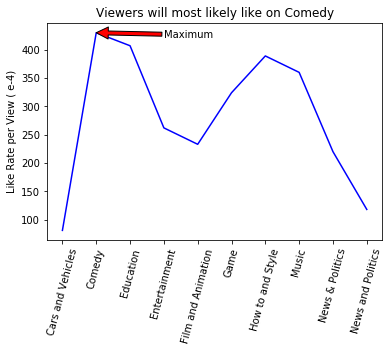

In [43]:
df_likes = df_ratio[['views', 'likes']]

df_likes['ratio']=range(len(df_likes))
for i in range(len(df_likes)):
   df_likes['ratio'][i] = df_likes.likes[i]/df_likes.views[i]* 10000

df_likes = df_likes[:10]
df_likes

plt.xticks(range(len(df_likes)), df_likes.index, rotation = 75)
plt.plot(range(len(df_likes)),df_likes.ratio, color = 'b')
        
plt.title('Viewers will most likely like on Comedy')
plt.ylabel('Like Rate per View ( e-4)')

ratio_max = df_likes.ratio.max()
ratio_max

plt.annotate('Maximum', xy = (1, ratio_max), xytext=(3, ratio_max-8),arrowprops=dict(facecolor='red'))

/home/liyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/liyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(6,24,'Second Maximum')

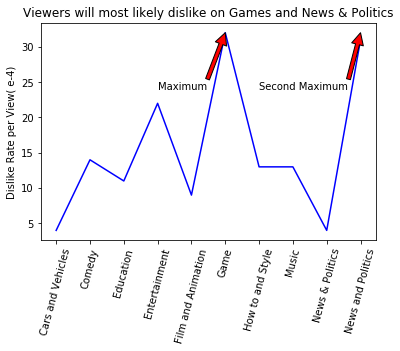

In [44]:

df_dislikes = df_ratio[['views', 'dislikes']]

df_dislikes['ratio']=range(len(df_dislikes))
for i in range(len(df_dislikes)):
   df_dislikes['ratio'][i] = df_dislikes.dislikes[i]/df_dislikes.views[i]* 10000

df_dislikes = df_dislikes[:10]
df_dislikes

plt.xticks(range(len(df_dislikes)), df_dislikes.index, rotation = 75)
plt.plot(range(len(df_dislikes)),df_dislikes.ratio, color = 'b')
        
plt.title('Viewers will most likely dislike on Games and News & Politics')
plt.ylabel('Dislike Rate per View( e-4)')


ratio_max = df_dislikes.ratio.max()
ratio_max

plt.annotate('Maximum', xy = (5, ratio_max), xytext=(3, ratio_max-8),arrowprops=dict(facecolor='red'))
plt.annotate('Second Maximum', xy = (9, ratio_max), xytext=(6, ratio_max-8),arrowprops=dict(facecolor='red'))

Text(1,5183,'Second Maximum')

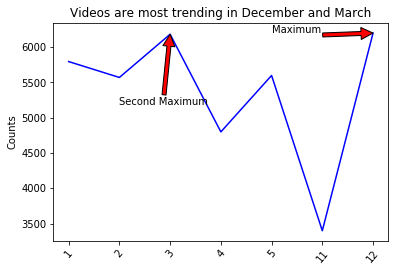

In [45]:
df_month = df.trending_month.value_counts()
df_month = pd.DataFrame(df_month)
df_month = df_month.sort_index()
df_month

plt.xticks(range(len(df_month)), df_month.index, rotation = 50)
plt.plot(range(len(df_month)),df_month.trending_month, color = 'b')
        
plt.title('Videos are most trending in December and March')
plt.ylabel('Counts')

plt.annotate('Maximum', xy = (6, df_month.max()), xytext=(4, df_month.max()),arrowprops=dict(facecolor='red'))
plt.annotate('Second Maximum', xy = (2, df_month.trending_month[3]), xytext=(1, df_month.trending_month[3]-1000),arrowprops=dict(facecolor='red'))

Text(9,3319,'Maximum')

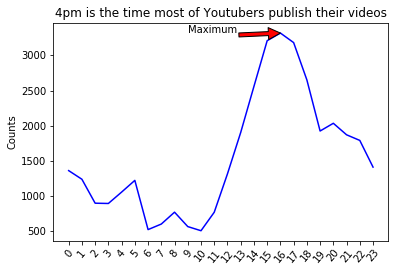

In [46]:
df_publish_hour= df.publish_hour.value_counts()
df_publish_hour = pd.DataFrame(df_publish_hour)
df_publish_hour = df_publish_hour.sort_index()

df_publish_hour

plt.xticks(range(len(df_publish_hour)), df_publish_hour.index, rotation = 50)
plt.plot(range(len(df_publish_hour)),df_publish_hour.publish_hour, color = 'b')
        
plt.title('4pm is the time most of Youtubers publish their videos')
plt.ylabel('Counts')

plt.annotate('Maximum', xy = (16, df_publish_hour.max()), xytext=(9, df_publish_hour.max()),arrowprops=dict(facecolor='red'))

In [47]:

# Linear Regression  
df_n = df[['trending_month', 'publish_hour','likes','dislikes','comment_count','views']]
df_n.head(2)
#y = df.views



,trending_month,publish_hour,likes,dislikes,comment_count,views
0,11,17,57527,2966,15954,748374
1,11,7,97185,6146,12703,2418783


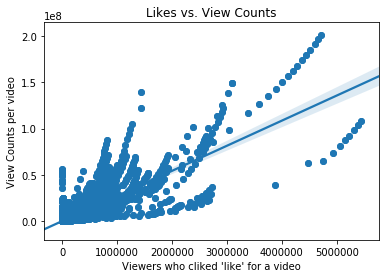

In [48]:
plt.scatter(df_n.likes, df_n.views)

sns.regplot(df_n.likes, df_n.views, fit_reg=True)


plt.xlabel("Viewers who cliked 'like' for a video")
plt.ylabel("View Counts per video")
plt.title("Likes vs. View Counts")
plt.show()

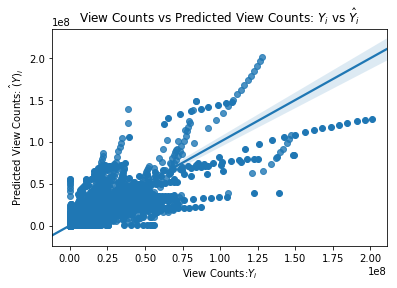

In [49]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(df_n.likes.values.reshape(-1,1), df_n.views)

plt.scatter(df.views, lm.predict(df.likes.values.reshape(-1,1)))
sns.regplot(lm.predict(df.likes.values.reshape(-1,1)), df.views, fit_reg=True)

plt.title("View Counts vs Predicted View Counts: $Y_i$ vs $\hat{Y}_i$")
plt.xlabel("View Counts:$Y_i$")
plt.ylabel("Predicted View Counts: $\hat(Y)_i$")
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df_n.drop(['views'], axis =1)
y = df_n.views.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(26284, 5)
(11265, 5)


In [51]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

lm2 = LinearRegression()

lm2.fit(X, y)

m = sm.OLS(y, X).fit()
print(m.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 2.942e+04
Date:                Fri, 22 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:43:59   Log-Likelihood:            -6.1561e+05
No. Observations:               37549   AIC:                         1.231e+06
Df Residuals:                   37544   BIC:                         1.231e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
trending_month  7253.3615   3638.618      1.

https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends/linear_regression.ipynb


1. use train_test_split and split the data into training and test datasets
2. build same linear regression model on only training data. Evaluate performance of the trained model on the test data 
3. use cross validation to tune linear regression model on training data again then test performance on test data
4. Try out other models SVM, decision tree, random forest, gradient boosting

In [52]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Build same linear regression model on only training data. Evaluate performance of the trained model on the test data 
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7731168173127299
Root Mean Squared Error: 3315255.7517644824


In [53]:
# Use cross validation to tune linear regression model on training data again then test performance on test data

from sklearn.model_selection import cross_val_score
reg = LinearRegression()
reg.fit(X_train, y_train)

cv_scores = cross_val_score(reg, X_test, y_test, cv=10)
nmse_scores = cross_val_score(reg, X_test, y_test, cv=10,scoring='neg_mean_squared_error')

print("R^2: {}".format(np.mean(cv_scores)))
print("Negative Root Mean Squared Error: {}".format(np.mean(nmse_scores)))


R^2: 0.7475754728479306
Negative Root Mean Squared Error: -11158621864039.723


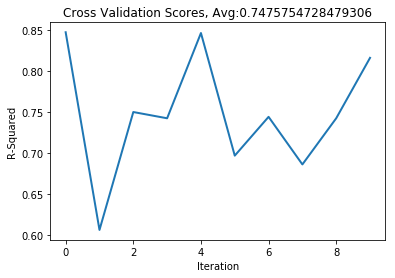

In [54]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(cv_scores))],cv_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(cv_scores)))
plt.show()

In [55]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR

svr_lin = LinearSVR(C=1000)
svr_lin_model = svr_lin.fit(X_train, y_train)

y_lin = svr_lin_model.predict(X_test)

In [56]:
print("R^2: {}".format(svr_lin_model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_lin))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6223845633914988
Root Mean Squared Error: 4277014.810241759


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=1)
pca = pca.fit_transform(X_test)
X_test_pca = pca[:,0].reshape(-1,1)

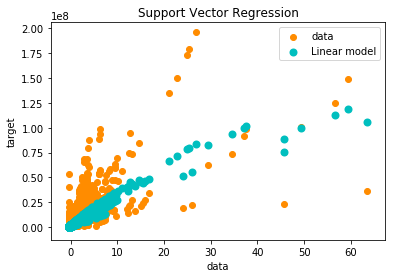

In [58]:
# Look at the results
lw = 2
plt.scatter(X_test_pca, y_test, color='darkorange', label='data')
plt.scatter(X_test_pca, y_lin, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [59]:
# decision tree 
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [60]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

print("Tree one R^2: {}".format(regr_1.score(X_test, y_test))) # max_depth = 0

print("Tree two R^2: {}".format(regr_2.score(X_test, y_test))) # max_depth = 5


rmse_1 = np.sqrt(mean_squared_error(y_test, y_1))
rmse_2 = np.sqrt(mean_squared_error(y_test, y_2))
                 
print("Tree one Root Mean Squared Error: {}".format(rmse_1))
print("Tree two Root Mean Squared Error: {}".format(rmse_2))

Tree one R^2: 0.9253810156876101
Tree two R^2: 0.843513452809086
Tree one Root Mean Squared Error: 1901255.7957531882
Tree two Root Mean Squared Error: 2753305.4116950906


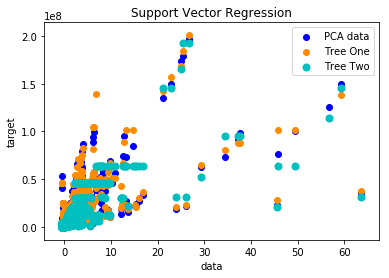

In [61]:
lw = 2
plt.scatter(X_test_pca, y_test, color='b', label='data')
plt.scatter(X_test_pca, y_1, color='darkorange', label='data')
plt.scatter(X_test_pca, y_2, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend(['PCA data','Tree One','Tree Two'])
plt.show()

In [62]:
# Random Forests
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=1)
regr.fit(X_train, y_train)

print(regr.feature_importances_)


[0.0211902  0.03263369 0.74845679 0.15075258 0.04696674]


In [63]:
X_train

array([[ 1.46918569,  0.20355385, -0.31997354, -0.10959544, -0.21427043],
       [-1.04390013,  1.28537208, -0.21458553, -0.09975109, -0.14269869],
       [ 1.72049427, -1.34190077, -0.23025652, -0.11216839, -0.19438287],
       ...,
       [-1.04390013,  1.13082662,  0.45798015, -0.09311362,  2.09579547],
       [ 1.46918569,  0.51264477, -0.14373707, -0.09919175, -0.14838923],
       [-0.79259154, -0.10553708, -0.31154581, -0.11541255, -0.21582506]])

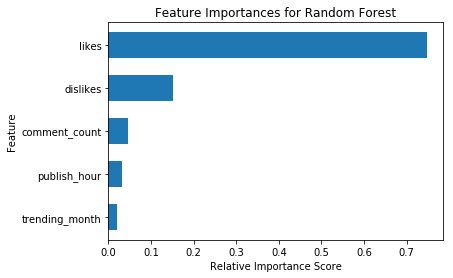

In [64]:
feature_names = X.columns

regr_feature_importances = regr.feature_importances_
regr_feature_names, regr_feature_scores = zip(*sorted(zip(feature_names, regr_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(regr_feature_names)))
plt.barh(y_position, regr_feature_scores, height=0.6, align='center')
plt.yticks(y_position , regr_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Random Forest')

In [65]:
y_1 = regr.predict(X_test)

print("Tree one R^2: {}".format(regr.score(X_test, y_test)))

rmse_1 = np.sqrt(mean_squared_error(y_test, y_1))
                 
print("Tree one Root Mean Squared Error: {}".format(rmse_1))


Tree one R^2: 0.9563351726789749
Tree one Root Mean Squared Error: 1454392.9404071828


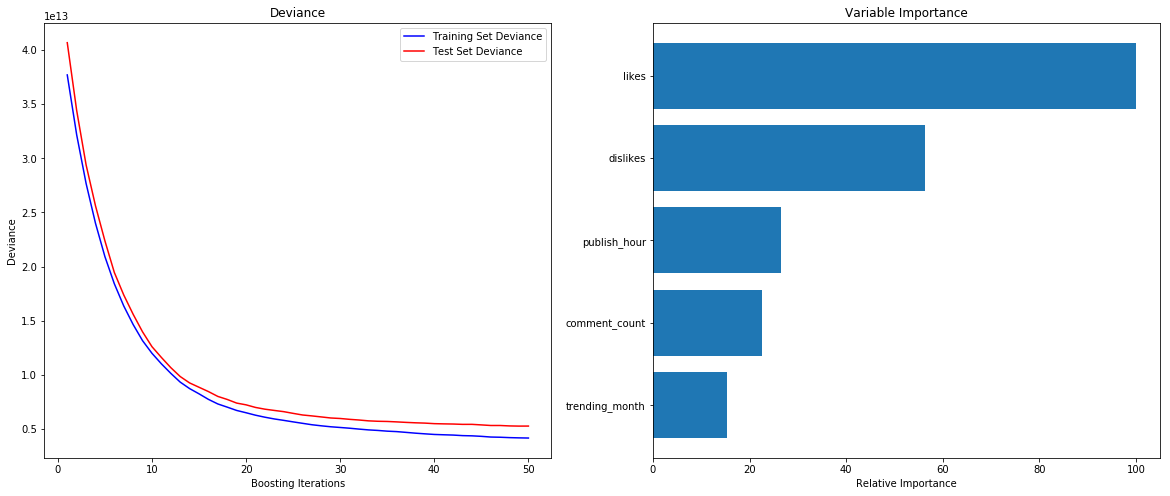

In [66]:
#Gradient Boosting

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

params = {'n_estimators':50, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

params = {'n_estimators':50}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [67]:
print("R^2: {}".format(clf.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(mse))


R^2: 0.8910618180618006
Root Mean Squared Error: 5277301317182.821


In [68]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

hyperparamter tuning for the best model 
Grid Search With Cross Validation
https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends/decision_tree_regression.ipynb

In [69]:
#max_depth=3, min_samples_split=5, max_leaf_nodes=10
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)



0.9491547664302662

In [70]:
#param_grid = {"criterion": ["mse", "mae"],
           #   "min_samples_split": [10, 20, 40],
            #  "max_depth": [2, 6, 8],
            #  "min_samples_leaf": [20, 40, 100],
             # "max_leaf_nodes": [5, 20, 100, 500, 800]
            #  }

param_grid = {"criterion": ["mse"],
              "min_samples_split": [2, 3],
              #"max_depth": [3, 4],
              "min_samples_leaf": [10, 20, 30],
              "max_leaf_nodes": [20,40,60]}


In [71]:
from sklearn.model_selection import GridSearchCV

grid_cv_dtr = GridSearchCV(dtr, param_grid, n_jobs=4, cv=5, return_train_score=True)

In [72]:
grid_cv_dtr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'criterion': ['mse'], 'min_samples_split': [2, 3], 'min_samples_leaf': [10, 20, 30], 'max_leaf_nodes': [20, 40, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.8481297179350443
Best Hyperparameters::
{'criterion': 'mse', 'max_leaf_nodes': 60, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [74]:
df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df.head(2)
#print(df.shape)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038639,0.001535,0.001107,0.000191,mse,20,10,2,"{'criterion': 'mse', 'max_leaf_nodes': 20, 'mi...",0.76972,...,0.818636,0.040863,5,0.868721,0.862186,0.840052,0.846441,0.851456,0.853771,0.010408
1,0.037500,0.002365,0.000773,0.000039,mse,20,10,3,"{'criterion': 'mse', 'max_leaf_nodes': 20, 'mi...",0.76972,...,0.818636,0.040863,5,0.868721,0.862186,0.840052,0.846441,0.851456,0.853771,0.010408


[Text(0.5,1,'Effect of Depth and Leaf Nodes on Model Performance')]

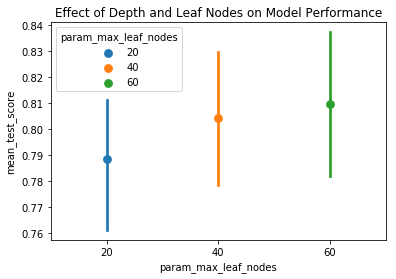

In [75]:
import seaborn as sn

fig,ax = plt.subplots()
sn.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes'
                           ]],
             y='mean_test_score',x='param_max_leaf_nodes',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")



In [76]:
predicted = grid_cv_dtr.best_estimator_.predict(X_test)
residuals = y_test.flatten()-predicted

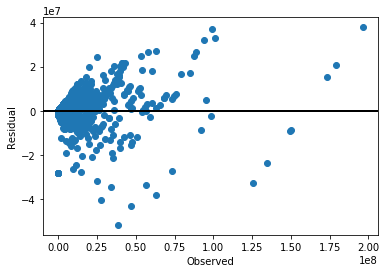

In [77]:
fig, ax = plt.subplots()
ax.scatter(y_test.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [78]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X_train, y_train, cv=10,scoring='neg_mean_squared_error')

In [79]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.8435189290818226
MSE::-6369214508787.628


In [80]:
y_1 = grid_cv_dtr.best_estimator_.predict(X_test)

print("Tree one R^2: {}".format(grid_cv_dtr.best_estimator_.score(X_test, y_test)))

rmse_1 = np.sqrt(mean_squared_error(y_test, y_1))
                 
print("Tree one Root Mean Squared Error: {}".format(rmse_1))

Tree one R^2: 0.8755169363559091
Tree one Root Mean Squared Error: 2455675.7321696724


In [81]:
dtrf = RandomForestRegressor(random_state = 0)
dtrf.fit(X_train,y_train)
dtrf.score(X_test,y_test)

0.9544285390756512

In [82]:
param_grid = {'n_estimators': [50, 100, 200],
              "criterion": ["mse"],
              #"min_samples_split": [2, 3],
              "max_features": ['auto','log2', None]
              #"max_depth": [3, 4],
              #"min_samples_leaf": [10, 20, 30],
              #"max_leaf_nodes": [20,40,60]
             }

In [83]:
grid_cv_dtrf = GridSearchCV(dtrf, param_grid, n_jobs=4, cv=5)

In [84]:
grid_cv_dtrf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_estimators': [50, 100, 200], 'criterion': ['mse'], 'max_features': ['auto', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
print("R-Squared::{}".format(grid_cv_dtrf.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtrf.best_params_))

R-Squared::0.9382609850453063
Best Hyperparameters::
{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 100}


In [86]:
y_1 = grid_cv_dtrf.best_estimator_.predict(X_test)

print("Tree one R^2: {}".format(grid_cv_dtrf.best_estimator_.score(X_test, y_test)))

rmse_1 = np.sqrt(mean_squared_error(y_test, y_1))
                 
print("Tree one Root Mean Squared Error: {}".format(rmse_1))

Tree one R^2: 0.9656872061674027
Tree one Root Mean Squared Error: 1289270.1411325312
